In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
books_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Books.csv")
ratings_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Ratings.csv")
users_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Users.csv")

In [3]:
data=ratings_df.merge(users_df,left_on='User-ID',right_on='User-ID',how="left")

In [4]:
data=data.merge(books_df,left_on='ISBN',right_on='ISBN',how="left")

In [5]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1048575 non-null  int64  
 1   ISBN                 1048575 non-null  object 
 2   Book-Rating          1048575 non-null  int64  
 3   Location             1048575 non-null  object 
 4   Age                  764232 non-null   float64
 5   Book-Title           941112 non-null   object 
 6   Book-Author          941111 non-null   object 
 7   Year-Of-Publication  941112 non-null   object 
 8   Publisher            941110 non-null   object 
 9   Image-URL-S          941112 non-null   object 
 10  Image-URL-M          941112 non-null   object 
 11  Image-URL-L          941108 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 104.0+ MB


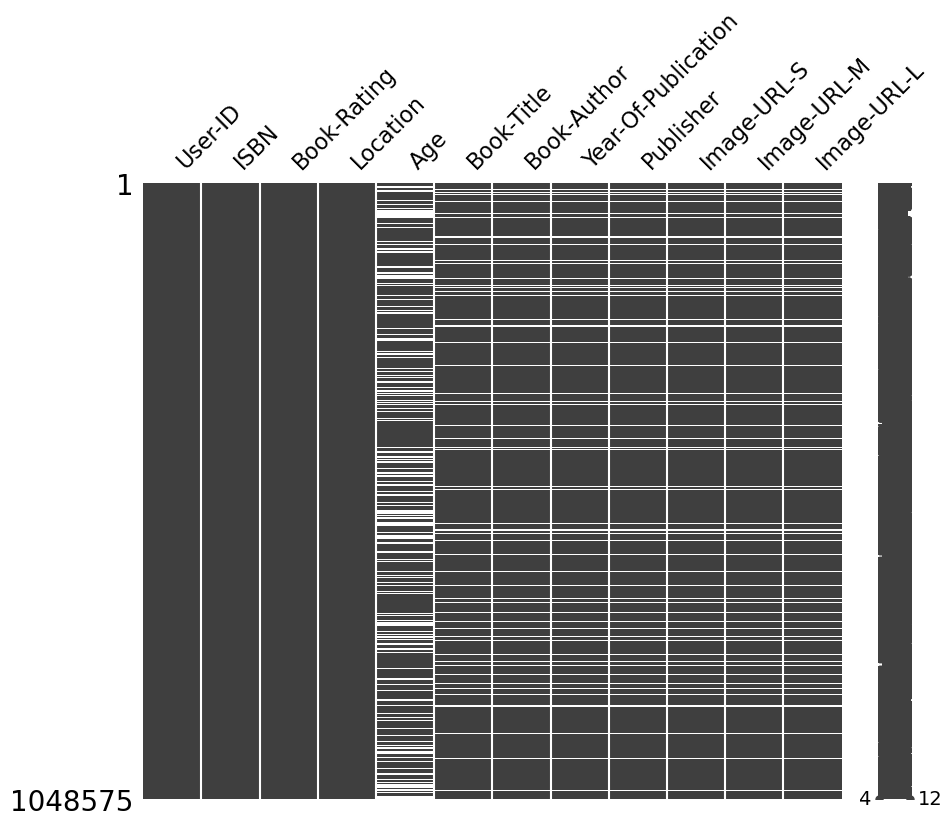

In [7]:
import missingno as mn
mn.matrix(data,figsize=(10,8));

In [8]:
null_per_missing = data.isnull().sum() * 100 / len(data)
null_per_missing

User-ID                 0.000000
ISBN                    0.000000
Book-Rating             0.000000
Location                0.000000
Age                    27.117087
Book-Title             10.248480
Book-Author            10.248575
Year-Of-Publication    10.248480
Publisher              10.248671
Image-URL-S            10.248480
Image-URL-M            10.248480
Image-URL-L            10.248862
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

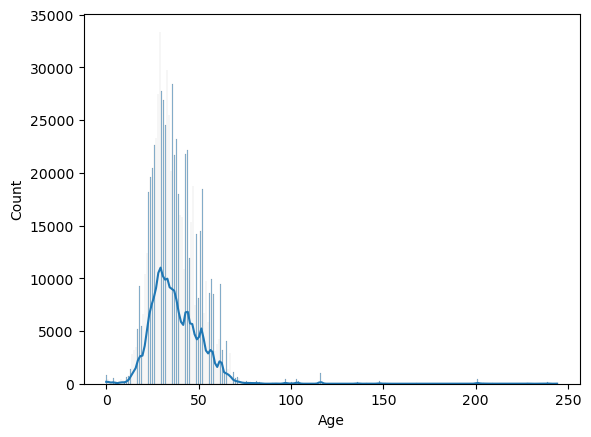

In [9]:
sns.histplot(data['Age'],kde=True)

In [10]:
data['Age']=data['Age'].fillna(method='ffill')

In [11]:
data['Age']=data['Age'].fillna(method='bfill')

In [12]:
# Rating distribution

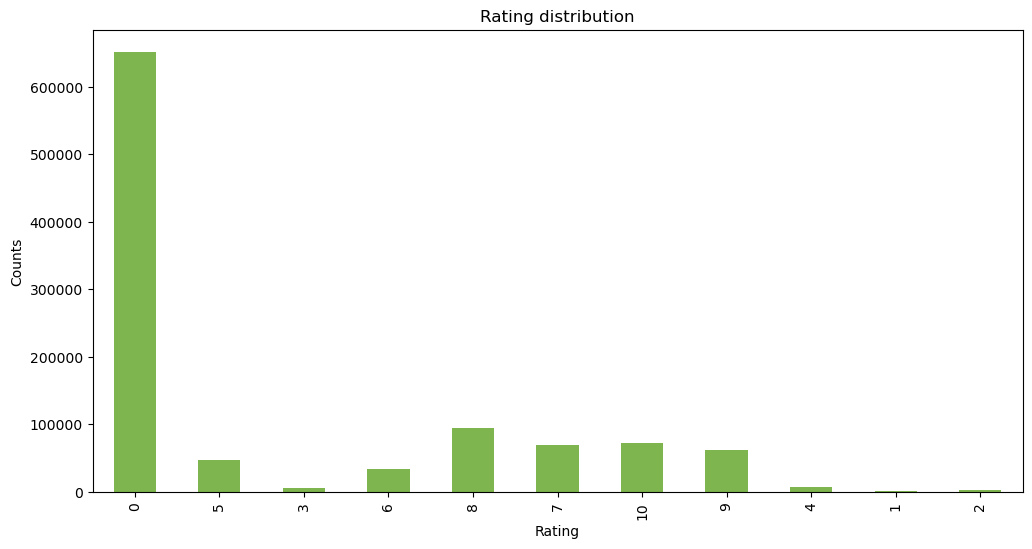

In [13]:
fi=plt.figure(figsize=(12,6))
data['Book-Rating'].value_counts(sort=False).plot(kind='bar',color='#7eb54e')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.rc("font",size=15)

In [14]:
rating_count=pd.DataFrame(data.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662


In [15]:
data['Year-Of-Publication'].unique()

array([2002, '2001', 1996, '1999', 1998, nan, 2001, 1994, 1995, 2003,
       1997, '1995', 1999, '1998', '2024', 1992, '1983', '2002', '1996',
       '2000', 0, '1989', '2003', '1991', 1993, '1994', 1976, '1993',
       1991, '0', 2000, 1983, 1990, 1982, 1988, 1981, '1988', 1989, 1986,
       '1987', '1992', 1987, '1980', '1990', '1997', 2004, 1984, '1982',
       '1985', 1985, 1979, '2004', '1984', 1974, '1979', 1977, 1965, 1972,
       '1978', '1986', '1981', 1971, 1962, '1977', 1957, 1958, 1960, 1963,
       1969, '1974', 1978, 1970, '1972', 1980, '1975', 1959, '1960', 1968,
       '1976', '1970', '1971', 1975, 1973, '1950', '1969', '1962', 1964,
       1955, 1953, 1966, '1965', '1963', '1973', 1930, '1964', 1961,
       '1952', 1940, '1968', 1954, '1967', '1911', 1952, 1946, 1941, 1920,
       1967, 1956, 1942, 1951, 1948, '1959', 1950, 2005, 1943, 1937, 1929,
       1923, 1945, 1947, 1936, 1925, '1966', '1958', 1927, 2030, 2011,
       2020, 1939, 1926, 1938, '1961', 1911, 1904, 1

In [16]:
df=data.dropna()

In [17]:
df['Year-Of-Publication']=df['Year-Of-Publication'].astype(int)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,941105.0,128793.839451,74247.985759,2.0,63494.0,128835.0,193560.0,278854.0
Book-Rating,941105.0,2.851685,3.857918,0.0,0.0,0.0,7.0,10.0
Age,941105.0,37.483763,14.231424,0.0,28.0,35.0,46.0,244.0
Year-Of-Publication,941105.0,1968.199841,231.030436,0.0,1992.0,1997.0,2001.0,2050.0


<AxesSubplot:xlabel='Age'>

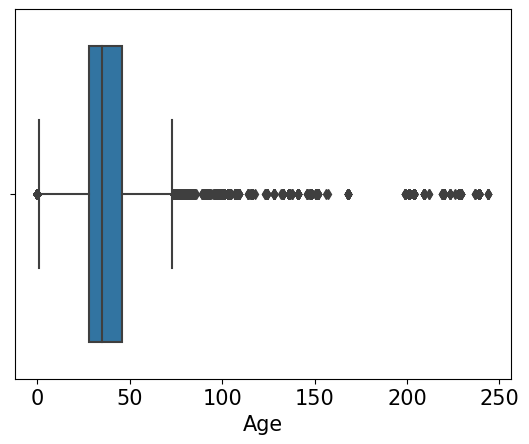

In [19]:
sns.boxplot(df['Age'])

In [20]:
df[df['Age']>100]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4175,278302,2070495027,9,"düsseldorf, nordrhein-westfalen, germany",104.0,Total Kheops,Jean Claude Izzo,0,Gallimard French,http://images.amazon.com/images/P/2070495027.0...,http://images.amazon.com/images/P/2070495027.0...,http://images.amazon.com/images/P/2070495027.0...
19018,3437,60009225,0,"honolulu, hawaii, usa",103.0,Call Each River Jordan,Owen Parry,2002,HarperTorch,http://images.amazon.com/images/P/0060009225.0...,http://images.amazon.com/images/P/0060009225.0...,http://images.amazon.com/images/P/0060009225.0...
19019,3437,60198524,8,"honolulu, hawaii, usa",103.0,Population: 485 : Meeting Your Neighbors One S...,Michael Perry,2002,HarperCollins,http://images.amazon.com/images/P/0060198524.0...,http://images.amazon.com/images/P/0060198524.0...,http://images.amazon.com/images/P/0060198524.0...
19020,3437,60964049,10,"honolulu, hawaii, usa",103.0,"Tales of the City (Tales of the City Series, V...",Armistead Maupin,1989,Perennial,http://images.amazon.com/images/P/0060964049.0...,http://images.amazon.com/images/P/0060964049.0...,http://images.amazon.com/images/P/0060964049.0...
19021,3437,380797399,0,"honolulu, hawaii, usa",103.0,Faded Coat of Blue,Owen Parry,2000,Avon,http://images.amazon.com/images/P/0380797399.0...,http://images.amazon.com/images/P/0380797399.0...,http://images.amazon.com/images/P/0380797399.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1022526,245231,671017136,9,"christchurch, canterbury, nz",220.0,Halloween Rain (Buffy the Vampire Slayer),Christopher Golden,1997,Simon Spotlight Entertainment,http://images.amazon.com/images/P/0671017136.0...,http://images.amazon.com/images/P/0671017136.0...,http://images.amazon.com/images/P/0671017136.0...
1022527,245231,671021346,0,"christchurch, canterbury, nz",220.0,"Blooded (Buffy the Vampire Slayer, Book 5)",Christopher Golden,1998,Simon Spotlight Entertainment,http://images.amazon.com/images/P/0671021346.0...,http://images.amazon.com/images/P/0671021346.0...,http://images.amazon.com/images/P/0671021346.0...
1022528,245231,671026313,10,"christchurch, canterbury, nz",220.0,"The Angel Chronicles, Volume 3",Nancy Holder,1999,Simon Spotlight Entertainment,http://images.amazon.com/images/P/0671026313.0...,http://images.amazon.com/images/P/0671026313.0...,http://images.amazon.com/images/P/0671026313.0...
1022529,245231,1550821733,0,"christchurch, canterbury, nz",220.0,Prosody at the Cafe Du Coin,Jeff Bien,1996,Quarry Press,http://images.amazon.com/images/P/1550821733.0...,http://images.amazon.com/images/P/1550821733.0...,http://images.amazon.com/images/P/1550821733.0...


In [21]:
# EDA IS DONE
df.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,941105.000000,941105.000000,941105.000000,941105.000000
mean,128793.839451,2.851685,37.483763,1968.199841
std,74247.985759,3.857918,14.231424,231.030436
min,2.000000,0.000000,0.000000,0.000000
25%,63494.000000,0.000000,28.000000,1992.000000
50%,128835.000000,0.000000,35.000000,1997.000000
75%,193560.000000,7.000000,46.000000,2001.000000
max,278854.000000,10.000000,244.000000,2050.000000


#### It can be seen from the below table that the min and max rating from the user is 0 and 10 respectively. The average rating value is 2.85.




In [22]:
df.groupby('ISBN')['Book-Rating'].count()

ISBN
000104687X    1
000104799X    2
000123207X    1
000160418X    2
000184251X    1
             ..
B000234N3A    1
B000234NC6    1
B00029DGGO    1
B0002JV9PY    1
B0002K6K8O    1
Name: Book-Rating, Length: 257808, dtype: int64

In [23]:
# counting unique values
n_users = len(pd.unique(df['User-ID']))
  
print("No.of.users :", 
      n_users)

No.of.users : 83643


In [24]:
# # List of 10 movies with high number of ratings

<AxesSubplot:xlabel='Book-Title'>

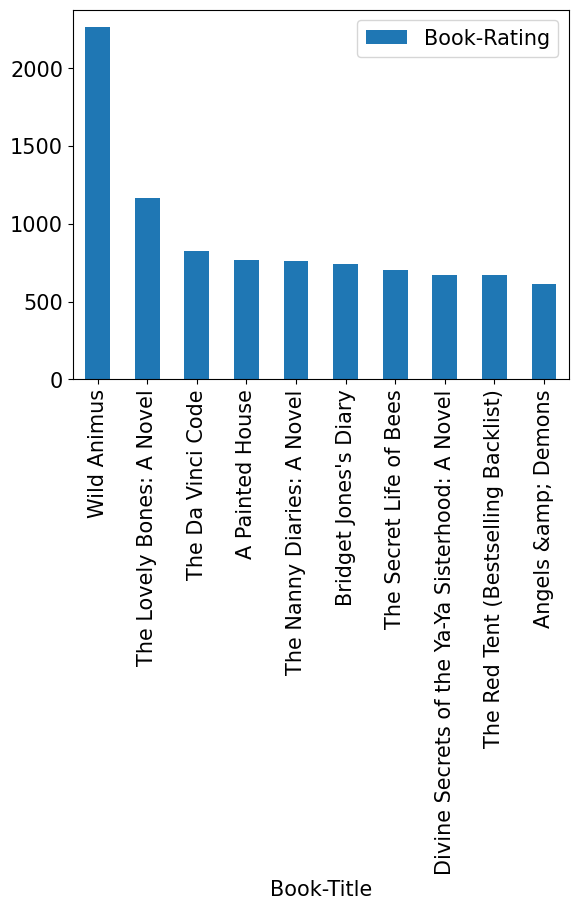

In [25]:
high_ratings=df.groupby('Book-Title')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

In [26]:
## List of 10 movies with high number of ratings

In [27]:
high_ratings1=df.groupby('Book-Author')[['Book-Rating']].count()
high_ratings=high_ratings1.nlargest(10,columns='Book-Rating')
high_ratings1

,Book-Rating
Book-Author,
D. Chiel,4
J. D. Landis,1
Mimma Balia,1
'N Sync,1
142 moms from all over the world,1
...,...
Â¢ystein LÂ²nn,1
Ã?dÃ¶n von HorvÃ¡th,4
Ã?Â?dÃ?Â¶n von Horvath,2


In [28]:
df.reset_index(inplace=True)

# Top 10 rated books 

In [29]:
df.drop(columns=['index'],axis=1,inplace=True)

In [30]:
df1=df.iloc[:,[0,1,5,6,7,3,2]]

In [31]:
df1

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,"tyler, texas, usa",0
1,276726,155061224,Rites of Passage,Judith Rae,2001,"seattle, washington, usa",5
2,276727,446520802,The Notebook,Nicholas Sparks,1996,"h, new south wales, australia",0
3,276729,052165615X,Help!: Level 1,Philip Prowse,1999,"rijeka, n/a, croatia",3
4,276729,521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,"rijeka, n/a, croatia",6
...,...,...,...,...,...,...,...
941100,250764,451410777,Sleep Tight (Onyx Book),Anne Frasier,2003,"cove, oregon, usa",0
941101,250764,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,"cove, oregon, usa",8
941102,250764,048623715X,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,"cove, oregon, usa",0
941103,250764,486256588,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,"cove, oregon, usa",0


In [32]:
from wordcloud import WordCloud

In [33]:
def create_wordcloud(data):
    wordcloud = WordCloud(
        width=1500,
        height=800,
        min_font_size=12,
        background_color='white'
    ).generate(data)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

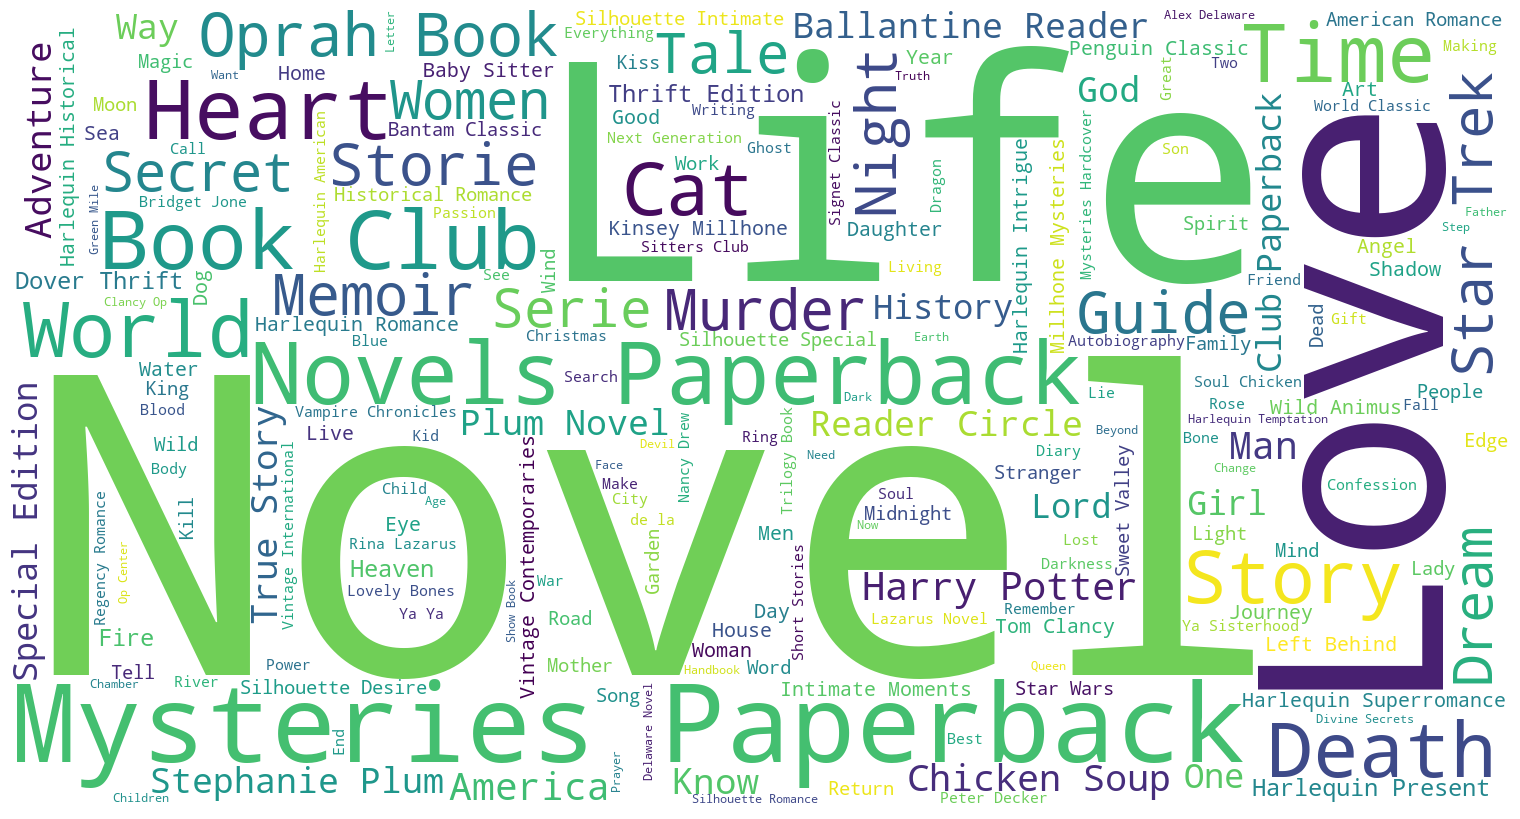

In [34]:
book_joined=' '.join(df['Book-Title'])
create_wordcloud(book_joined)

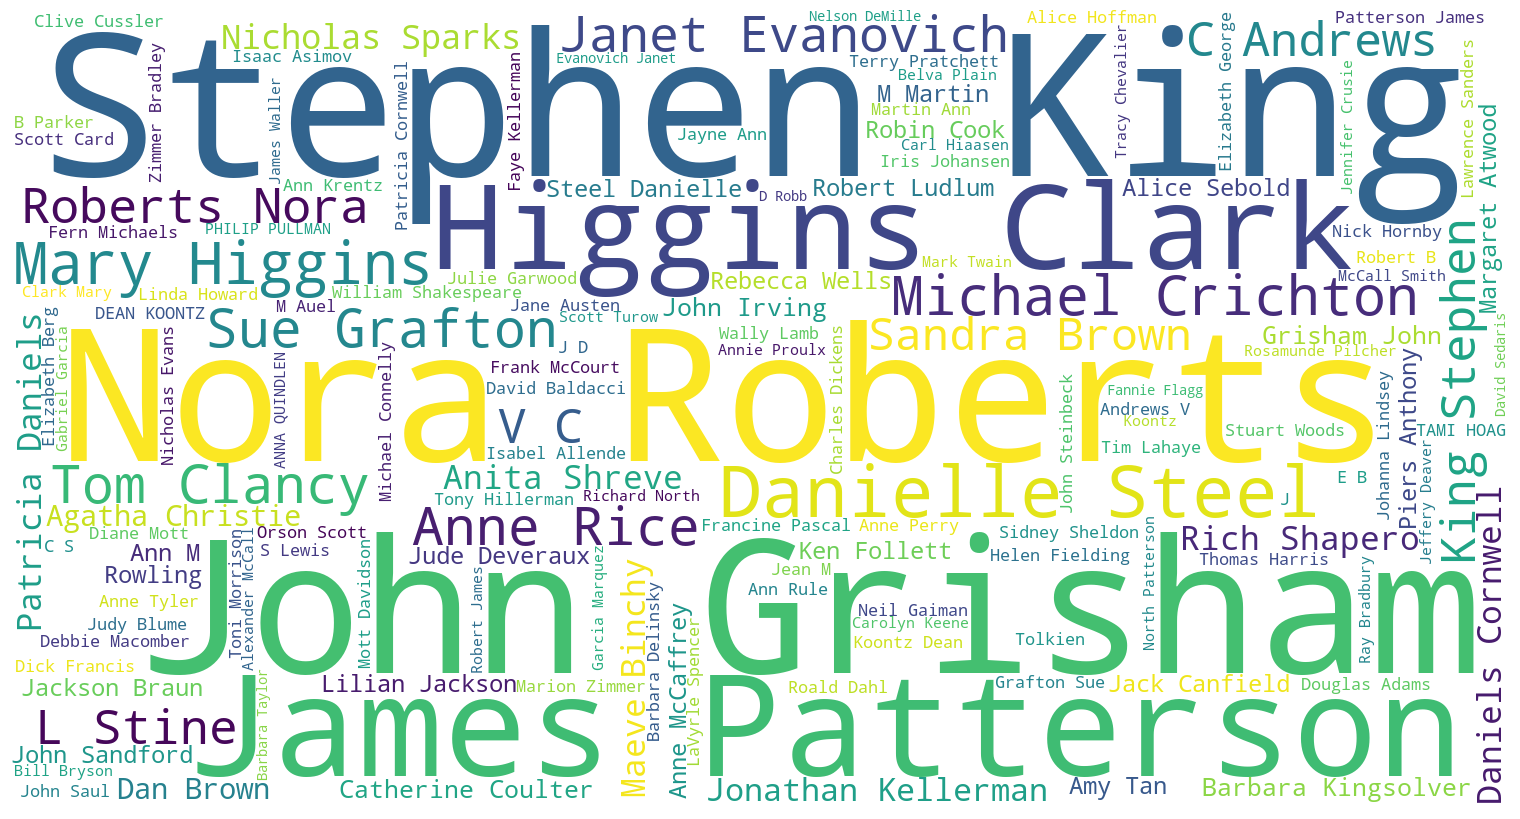

In [35]:
author_joined=' '.join(df['Book-Author'])
create_wordcloud(author_joined)

In [36]:
# No of books published as per year

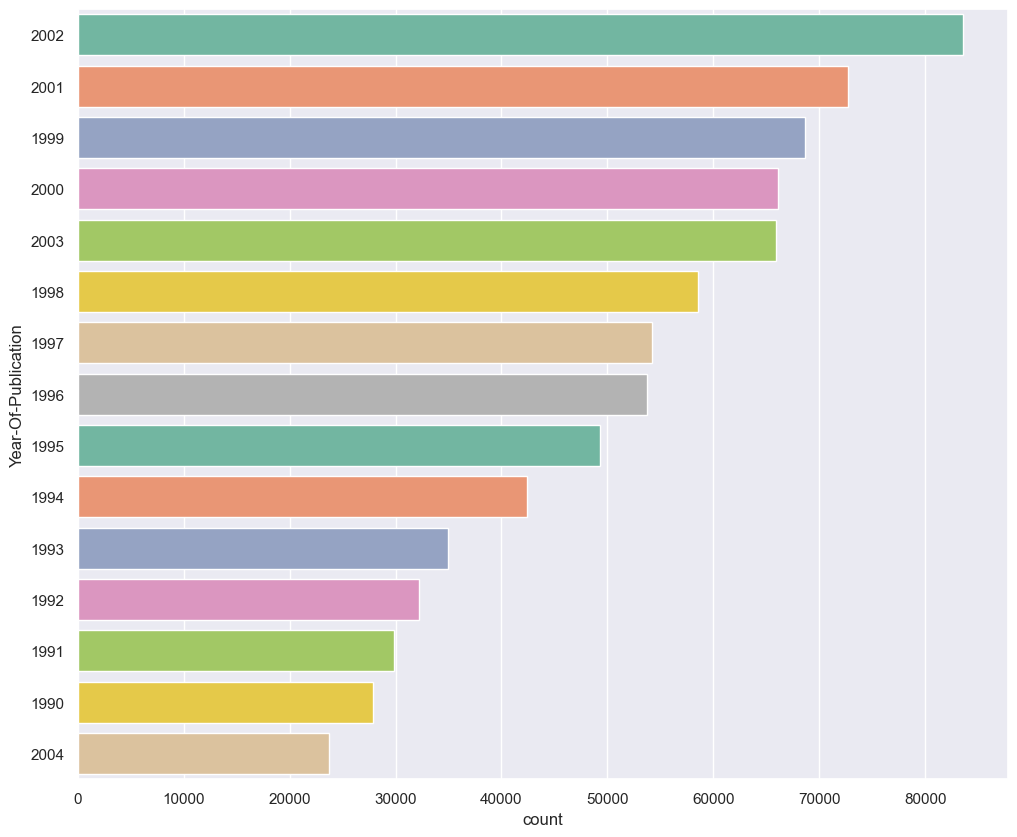

In [37]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df['Year-Of-Publication'], data=df, palette="Set2", order=df['Year-Of-Publication'].value_counts().index[0:15])

In [38]:
# In year 2002 more no of book got published

In [39]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import random

In [40]:
df1

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,"tyler, texas, usa",0
1,276726,155061224,Rites of Passage,Judith Rae,2001,"seattle, washington, usa",5
2,276727,446520802,The Notebook,Nicholas Sparks,1996,"h, new south wales, australia",0
3,276729,052165615X,Help!: Level 1,Philip Prowse,1999,"rijeka, n/a, croatia",3
4,276729,521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,"rijeka, n/a, croatia",6
...,...,...,...,...,...,...,...
941100,250764,451410777,Sleep Tight (Onyx Book),Anne Frasier,2003,"cove, oregon, usa",0
941101,250764,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,"cove, oregon, usa",8
941102,250764,048623715X,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,"cove, oregon, usa",0
941103,250764,486256588,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,"cove, oregon, usa",0


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941105 entries, 0 to 941104
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              941105 non-null  int64 
 1   ISBN                 941105 non-null  object
 2   Book-Title           941105 non-null  object
 3   Book-Author          941105 non-null  object
 4   Year-Of-Publication  941105 non-null  int32 
 5   Location             941105 non-null  object
 6   Book-Rating          941105 non-null  int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 46.7+ MB


# Popularity based recommender system

In [41]:
num_ratings=df1.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratings

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230210,Ã?Â?l- Connection.,1
230211,Ã?Â?lpiraten.,2
230212,Ã?Â?rger mit Produkt X. Roman.,4
230213,Ã?Â?stlich der Berge.,2


In [42]:
avg_ratings=df1.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230210,Ã?Â?l- Connection.,0.00
230211,Ã?Â?lpiraten.,0.00
230212,Ã?Â?rger mit Produkt X. Roman.,5.25
230213,Ã?Â?stlich der Berge.,4.00


In [43]:
popular_df=num_ratings.merge(avg_ratings,on='Book-Title')

# below are the top 100 books based on average ratings of books where books having minimum of 200 ratings each

In [44]:
popular_df=popular_df[popular_df['num_ratings']>=200].sort_values('avg_ratings',ascending=False).head(100)

In [45]:
popular_df=popular_df.merge(df1,on='Book-Title').drop_duplicates('Book-Title')

In [46]:
popular_df.loc[popular_df['avg_ratings']>5.5,['Book-Title']]

,Book-Title
0,Harry Potter and the Goblet of Fire (Book 4)
346,Harry Potter and the Prisoner of Azkaban (Book 3)
726,Harry Potter and the Sorcerer's Stone (Book 1)
970,Harry Potter and the Order of the Phoenix (Boo...


In [47]:
popular_df.loc[popular_df['avg_ratings'].idxmax(),['Book-Title','avg_ratings']]

Book-Title     Harry Potter and the Goblet of Fire (Book 4)
avg_ratings                                        5.945087
Name: 0, dtype: object

### book-Harry Potter and the Goblet of Fire (Book 4) has maximum average rattings of 5.945.

In [48]:
df1.groupby('Book-Author')['Book-Rating'].count().sort_values()

Book-Author
Joseph C. Pitt                1
James H. Robinson             1
Robert A., Ph.D. Nowlan       1
James H. Strong               1
James H. Sweet                1
                           ... 
Mary Higgins Clark         4409
James Patterson            5295
John Grisham               5469
Nora Roberts               7737
Stephen King               9075
Name: Book-Rating, Length: 97225, dtype: int64

In [52]:
#basic overview
print('After data cleaning, the final dataset has:')
print(len(df1.groupby(['Book-Title']).count()), 'books')
print(len(df1.groupby(['Book-Author']).count()), 'authors')
print(len(df1.groupby(['ISBN']).count()), 'book-code')

After data cleaning, the final dataset has:
230215 books
97225 authors
257808 book-code


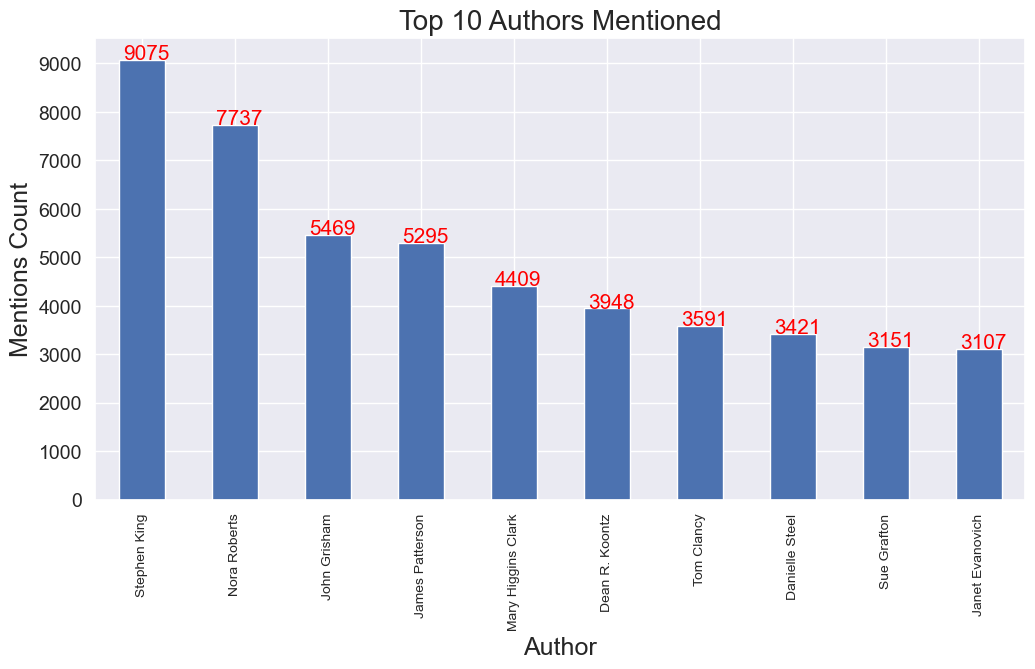

In [54]:
#bar graph for top 10 authors mentioned in the dataframe
top10_mention = df1['Book-Author'].value_counts()[:10]
plt.figure(figsize=[12,6])
top10_mention.plot(kind='bar')

plt.title("Top 10 Authors Mentioned", fontsize=20)
plt.xlabel('Author', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel('Mentions Count', fontsize=18)
plt.yticks(np.arange(0,10000,1000), fontsize=14)

for index, value in enumerate(list(top10_mention.values)):
  plt.text(index-0.2, value+10, str(value), color = 'red', fontsize = 15)
plt.show()

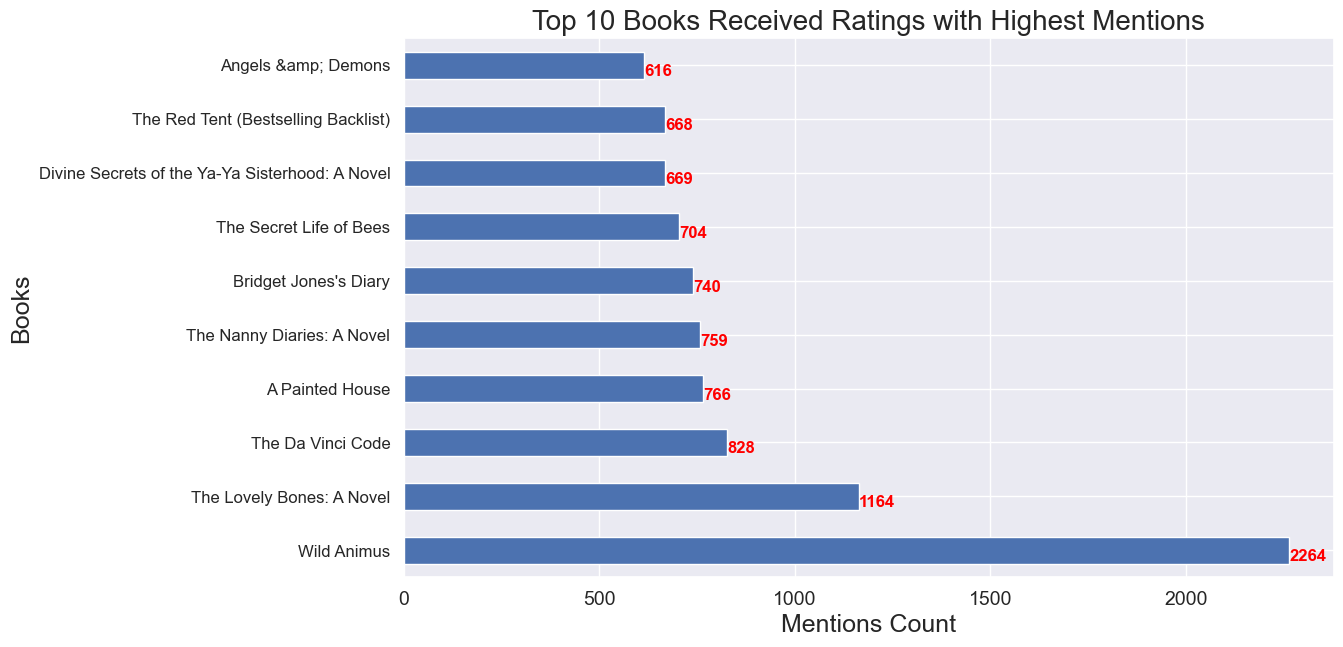

In [55]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,7])
ax = df1['Book-Title'].value_counts()[:10].plot.barh()

plt.title("Top 10 Books Received Ratings with Highest Mentions", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,2500,500),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Books', fontsize=18)

for index, value in enumerate(list(df1['Book-Title'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

# Content based collobarative filtering

In [56]:
x=df1.groupby("User-ID").count()["Book-Rating"]>50

In [57]:
x[x]

User-ID
243       True
254       True
507       True
638       True
643       True
          ... 
278188    True
278418    True
278582    True
278633    True
278843    True
Name: Book-Rating, Length: 2742, dtype: bool

In [58]:
x_table = x[x].index#boolean indexing x[x] helps us to filter the userid rated more than 50 times
x_table

Int64Index([   243,    254,    507,    638,    643,    741,    882,    929,
              1211,   1424,
            ...
            277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582,
            278633, 278843],
           dtype='int64', name='User-ID', length=2742)

In [59]:
# ISIN filters  only if its true

In [60]:
updated_rating = df1[df1["User-ID"].isin(x_table)]

In [61]:
updated_rating.sort_values(by='User-ID')

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
8732,243,803251718,Crazy Horse,Mari Sandoz,1961,"arden hills, minnesota, usa",5
8714,243,449911004,Patty Jane's House of Curl (Ballantine Reader'...,LORNA LANDVIK,1996,"arden hills, minnesota, usa",0
8712,243,446612790,2nd Chance,James Patterson,2003,"arden hills, minnesota, usa",0
8711,243,446610399,The Rescue,Nicholas Sparks,2001,"arden hills, minnesota, usa",0
8710,243,446606383,The Midnight Club,James Patterson,1999,"arden hills, minnesota, usa",6
...,...,...,...,...,...,...,...
8361,278843,440477093,The Secret Garden,Frances H. Burnett,1990,"pismo beach, california, usa",0
8362,278843,446678651,Fun with Phone Solicitors : 50 Ways to Get Even!,Robert Harris,2001,"pismo beach, california, usa",0
8363,278843,449223604,M Is for Malice,Sue Grafton,1998,"pismo beach, california, usa",0
8365,278843,553574760,Death at Buckingham Palace: Her Majesty Invest...,C. C. Benison,1996,"pismo beach, california, usa",0


In [62]:
y = updated_rating.groupby("Book-Title").count()["Book-Rating"]>=50

In [63]:
y_table=y[y].index

In [64]:
y[y].index

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Wuthering Heights (Penguin Classics)',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1207)

In [65]:
final_rating=updated_rating[updated_rating["Book-Title"].isin(y_table)]

In [66]:
final_rating

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
298,276925,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,"barcelona, barcelona, spain",10
303,276925,140327592,Matilda,Roald Dahl,1990,"barcelona, barcelona, spain",0
310,276925,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"barcelona, barcelona, spain",0
313,276925,385504209,The Da Vinci Code,Dan Brown,2003,"barcelona, barcelona, spain",8
335,276925,804106304,The Joy Luck Club,Amy Tan,1994,"barcelona, barcelona, spain",0
...,...,...,...,...,...,...,...
941085,250764,451173139,Night over Water,Ken Follett,1992,"cove, oregon, usa",0
941086,250764,451180410,Mortal Fear,Greg Iles,1998,"cove, oregon, usa",0
941088,250764,451191013,The Regulators,Stephen King,2002,"cove, oregon, usa",0
941090,250764,451192001,How Stella Got Her Groove Back,Terry McMillan,1997,"cove, oregon, usa",0


In [67]:
table = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating').fillna(0)

In [68]:
table

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
from scipy.sparse import csr_matrix
user_rating_matrix = csr_matrix(table.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
query_index = np.random.choice(table.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(table.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1122


In [77]:
table.shape

(1207, 2683)

In [78]:
table.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [79]:
table.index[query_index]

'To Kill a Mockingbird'

In [75]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(table.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Balzac and the Little Chinese Seamstress : A Novel:

1: Girl in Hyacinth Blue, with distance of 0.7825432370552677:
2: The Hours: A Novel, with distance of 0.8003262575676766:
3: Tears of the Giraffe (No.1 Ladies Detective Agency), with distance of 0.8110719879892994:
4: The Passion of Artemisia, with distance of 0.8198583345769633:
5: Winter Solstice, with distance of 0.8317268428878846:


# User based collaborative filtering

In [80]:
df2=df1.copy()

In [84]:
# no of ratings
len(df2['Book-Rating'])

len(df2['User-ID'].unique())

# no of unique book codes
len(df2['ISBN'].unique())

# no of unique books
len(df2['Book-Title'].unique())

230215

<AxesSubplot:>

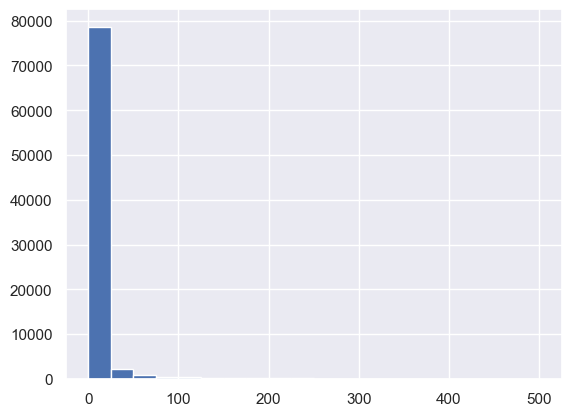

In [98]:
import statistics
ratings_per_user = df2.groupby('User-ID')['Book-Rating'].count()
statistics.mean(ratings_per_user.tolist())
#=> 91.05231321839081
# distribution of ratings per user
# (we may want to exclude users without many data points)
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,500))

3.650410382920623


<AxesSubplot:>

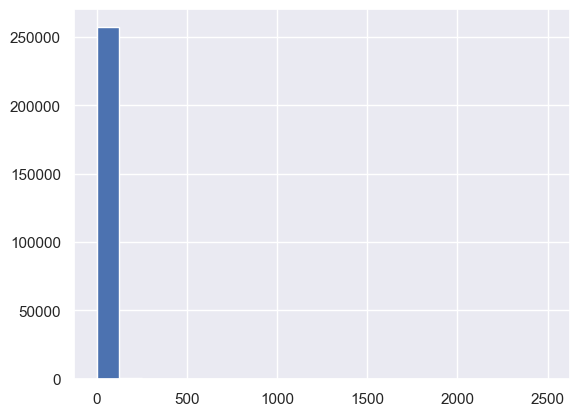

In [103]:
# avg number of ratings given per anime
ratings_per_anime = df2.groupby('ISBN')['Book-Rating'].count()
print(statistics.mean(ratings_per_anime.tolist()))
#=> 638.3843054296364
# distribution of ratings per anime
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_anime.hist(bins=20, range=(0,2500))

In [ ]:
# More than 20,000 users have given zero ratings
# more than 10,000 users have given ratings 10 ratings

In [105]:
# Filterd userid and book-title havng rated more than 50 times
final_rating

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
298,276925,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,"barcelona, barcelona, spain",10
303,276925,140327592,Matilda,Roald Dahl,1990,"barcelona, barcelona, spain",0
310,276925,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"barcelona, barcelona, spain",0
313,276925,385504209,The Da Vinci Code,Dan Brown,2003,"barcelona, barcelona, spain",8
335,276925,804106304,The Joy Luck Club,Amy Tan,1994,"barcelona, barcelona, spain",0
...,...,...,...,...,...,...,...
941085,250764,451173139,Night over Water,Ken Follett,1992,"cove, oregon, usa",0
941086,250764,451180410,Mortal Fear,Greg Iles,1998,"cove, oregon, usa",0
941088,250764,451191013,The Regulators,Stephen King,2002,"cove, oregon, usa",0
941090,250764,451192001,How Stella Got Her Groove Back,Terry McMillan,1997,"cove, oregon, usa",0


In [121]:
rating_matrix = final_rating.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
rating_matrix

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=5):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    
current_user = 254
# try it out
similar_user_indices = similar_users(current_user, rating_matrix)
print(similar_user_indices)

[108243, 239423, 183088, 208141, 212088]


In [130]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    
    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    # remove any rows without a 0 value. Anime not watched yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    # generate a list of animes the user has not seen
    animes_unseen = user_df_transposed.index.tolist()
    
    # filter avg ratings of similar users for only anime the current user has not seen
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n anime   
    top_n_books = similar_users_df_ordered.head(items)
    top_n_books_indices = top_n_books.index.tolist()
    # lookup these anime in the other dataframe to find names
    books_information = df2[df2['Book-Title'].isin(top_n_books_indices)]
    
    return books_information.head(50) #items
# try it out
recommend_item(254, similar_user_indices, rating_matrix)

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Location,Book-Rating
60,276788,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,"mentone, california, usa",7
393,276929,439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,"collex, geneva, switzerland",0
1324,277427,439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,"gilbert, arizona, usa",0
1325,277427,439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,"gilbert, arizona, usa",0
1326,277427,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,"gilbert, arizona, usa",0
3742,278356,439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,"lakeland, tennessee, usa",8
3743,278356,439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,"lakeland, tennessee, usa",10
3744,278356,439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,"lakeland, tennessee, usa",10
3745,278356,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,"lakeland, tennessee, usa",10
8899,254,439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,"minneapolis, minnesota, usa",9


In [ ]:
# step-2 user similarity

In [157]:
matrix = final_rating.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
matrix

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,...,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365
254,8.892295,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,...,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705
507,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,...,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940
638,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,8.782104,-0.217896,-0.217896,-0.217896,-0.217896,...,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896
643,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,...,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800


In [159]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011670,-0.007143,0.103114,-0.002945,-0.002945,-0.010350,-0.007115,-0.005098,0.151507,...,-0.005879,-0.007050,0.052568,-0.007653,NaN,-0.009625,-0.008373,-0.008489,0.041753,-0.008839
254,-0.011670,1.000000,0.254148,-0.017509,-0.003286,-0.003286,-0.011547,-0.007938,-0.005687,-0.010337,...,-0.006559,-0.007865,-0.012221,-0.008538,NaN,-0.010738,-0.009340,-0.009470,-0.013627,0.090352
507,-0.007143,0.254148,1.000000,-0.010718,-0.002011,-0.002011,-0.007068,-0.004859,-0.003481,-0.006328,...,-0.004015,-0.004814,-0.007481,-0.005226,NaN,-0.006573,-0.005718,-0.005797,-0.008341,-0.006036
638,0.103114,-0.017509,-0.010718,1.000000,-0.004419,-0.004419,0.112880,-0.010675,0.113857,0.049002,...,-0.008821,0.041065,-0.016435,0.060848,NaN,-0.014441,0.053474,-0.012736,0.085282,-0.013261
643,-0.002945,-0.003286,-0.002011,-0.004419,1.000000,-0.000829,-0.002914,-0.002003,-0.001435,-0.002609,...,-0.001655,-0.001985,-0.003084,-0.002155,NaN,-0.002710,-0.002357,-0.002390,-0.003439,-0.002489


In [160]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        , -0.01166985, -0.00714349, ..., -0.00848852,
         0.04175335, -0.0088389 ],
       [-0.01166985,  1.        ,  0.25414792, ..., -0.00946971,
        -0.01362665,  0.09035151],
       [-0.00714349,  0.25414792,  1.        , ..., -0.00579672,
        -0.00834132, -0.00603599],
       ...,
       [-0.00848852, -0.00946971, -0.00579672, ...,  1.        ,
        -0.00991188, -0.00717249],
       [ 0.04175335, -0.01362665, -0.00834132, ..., -0.00991188,
         1.        ,  0.0860499 ],
       [-0.0088389 ,  0.09035151, -0.00603599, ..., -0.00717249,
         0.0860499 ,  1.        ]])

In [161]:
# Pick a user ID
picked_userid = np.random.choice(user_similarity.index)

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011670,-0.007143,0.103114,-0.002945,-0.002945,-0.010350,-0.007115,-0.005098,0.151507,...,-0.005879,-0.007050,0.052568,-0.007653,NaN,-0.009625,-0.008373,-0.008489,0.041753,-0.008839
254,-0.011670,1.000000,0.254148,-0.017509,-0.003286,-0.003286,-0.011547,-0.007938,-0.005687,-0.010337,...,-0.006559,-0.007865,-0.012221,-0.008538,NaN,-0.010738,-0.009340,-0.009470,-0.013627,0.090352
507,-0.007143,0.254148,1.000000,-0.010718,-0.002011,-0.002011,-0.007068,-0.004859,-0.003481,-0.006328,...,-0.004015,-0.004814,-0.007481,-0.005226,NaN,-0.006573,-0.005718,-0.005797,-0.008341,-0.006036
638,0.103114,-0.017509,-0.010718,1.000000,-0.004419,-0.004419,0.112880,-0.010675,0.113857,0.049002,...,-0.008821,0.041065,-0.016435,0.060848,NaN,-0.014441,0.053474,-0.012736,0.085282,-0.013261
643,-0.002945,-0.003286,-0.002011,-0.004419,1.000000,-0.000829,-0.002914,-0.002003,-0.001435,-0.002609,...,-0.001655,-0.001985,-0.003084,-0.002155,NaN,-0.002710,-0.002357,-0.002390,-0.003439,-0.002489


In [162]:
# Number of similar users
n = 5

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 168144 are User-ID
245157    0.368504
137006    0.364920
104413    0.364920
145198    0.364920
71739     0.364920
Name: 168144, dtype: float64


In [163]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
168144,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,...,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423,-0.070423


In [164]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
71739,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,...,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628,-0.006628
104413,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,...,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457
137006,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,...,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457,-0.007457
145198,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,...,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971,-0.004971
245157,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,...,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370,-0.022370


In [165]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
308,Fahrenheit 451,1.675048
924,"The Golden Compass (His Dark Materials, Book 1)",0.733425
1061,"The Subtle Knife (His Dark Materials, Book 2)",0.733425
111,Bel Canto: A Novel,0.653272
174,Chasing the Dime,0.512322
0,1984,-0.003584
802,Tears of the Moon (Irish Trilogy),-0.003584
807,Terminal,-0.003584
806,Temptation,-0.003584
805,Tell No One,-0.003584
